In [1]:
import os 
os.chdir('../')

import sys
sys.path.append('scr/')

In [2]:
from itertools import chain
import re

import pandas as pd
import numpy as np
import http
import time
import json

from functools import reduce
from datetime import datetime
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import date, datetime

from urllib.error import HTTPError
from urllib.request import Request, urlopen

from basix import parquet

USER_AGENT = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"

BASE_URL = "https://www.icarros.com.br/ache/listaanuncios.jsp?bid=1&pag={page}&lis=0&ord=24&sop=sta_1.1_-cid_3632.1_-esc_2.1_-rai_0.1_"

N_BY_PAGE = 20

SLEEP_TIME_MEAN = 7
SLEEP_TIME_STD = 5
SLEEP_TIME_BIAS = 7

OUTPUT_PATH = 'data/raw/scrapped/'

In [5]:
df = pd.read_parquet(OUTPUT_PATH)
df['price'] = df['price'].astype(float)

In [26]:
0.5-0.6827/2



0.15865

In [27]:
0.5+0.6827/2

0.84135

In [30]:

temp

,p16,p50,p84
Ano,,,
2004,12000.0,12000.0,12000.0
2007,20000.0,20000.0,20000.0
2009,28000.0,28000.0,28000.0
2011,25040.0,41000.0,53840.0
2012,37392.0,42195.0,58700.0
2013,38592.0,57250.0,83900.0
2014,45454.0,54000.0,80140.0
2015,55294.0,68900.0,86700.0
2016,71303.2,86490.0,111703.2


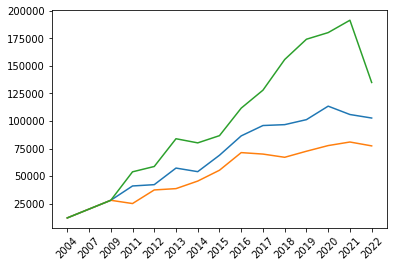

In [34]:
import matplotlib.pyplot as plt

temp = df.groupby('Ano').agg(
    p16 = ('price', lambda x: np.quantile(x, 0.16)),
    p50 = ('price', lambda x: np.quantile(x, 0.50)),
    p84 = ('price', lambda x: np.quantile(x, 0.84)),
).reset_index()


plt.plot(temp['Ano'], temp['p50'])
plt.plot(temp['Ano'], temp['p16'])
plt.plot(temp['Ano'], temp['p84'])
plt.xticks(rotation=45)
plt.show()

In [13]:
df.groupby('brand')['price'].median().sort_values()

brand
ford              72700.0
renault           80490.0
hyundai           80490.0
volkswagen        81900.0
chevrolet         91490.0
honda             94490.0
kia               98445.0
nissan            98490.0
peugeot           99701.0
mitsubishi        99900.0
fiat             106240.0
toyota           107695.0
citroen          110811.0
land-rover       119900.0
caoa-chery       121900.0
jeep             124490.0
mercedes-benz    132900.0
audi             132900.0
bmw              240490.0
porsche          510000.0
Name: price, dtype: float64